# BoomBikes's Demand Linear Regression Model Development

##### Done By

Name: **Arunkumar Gunasekaran**

Batch: **ML C57**  Assignment: **Bike Sharing Assignment**

Email: manigunasekaran30@gmail.com

# Bike Sharing Assignment

## Table of Contents
1. [Problem Statement](#Problem-Statement)
   - [Business Objective](#Business-Objective)
2. [Importing Necessary Modules](#Importing-Necessary-Modules)
3. [Data Understanding](#Data-Understanding)
   - [Loading Data from the CSV](#Loading-Data-from-the-CSV)
   - [Understanding Structure of dataset](#Understanding-Structure-of-dataset)
   - [Data Quality checks](#Data-Quality-checks)
4. [Data Preparation](#Data-Preparation)
    - [Fixing Data Types](#Fixing-Data-Types)
    - [Converting Values to clean and understandable format](#Converting-Values-to-clean-and-understandable-format)
    - [Droping irrelevant columns](#Droping-irrelevant-columns)
    - [EDA](#EDA)
       - [Univariate Analysis](#Univariate-Analysis)
       - [Bivariate Analysis](#Bivariate-Analysis)
    - [Creating Dummy Variables](#Creating-Dummy-Variables)
5. [Model Building](#Model-Building)
    - [Test Train Split](#Test-Train-Split)
    - [Scaling features](#Scaling-features)
    - [Feature Selection](#Feature-Selection)
       - [RFE](#RFE)
       - [Manual Feature Selection](#Manual-Feature-Selection)
6. [Model Evaluation](#Model-Evaluation)
     - [Residual Analysis](#Residual-Analysis)
     - [Model Evaluation using Test data](#model-Evaluation-using-Test-data)
     - [Model Efficiency](#Model-Efficiency)
7. [Conclusion](#Conclusion)

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Business Objective

1. To model the demand for shared bikes with the available independent variables
2. To understand Which variables are significant in predicting the demand for shared bikes
3. To understand how exactly the demands vary with different features

So, accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations


We need to Build a machine Learning model to predict the demand, As the demand is the numerical values and we have existing data labels. We would proceed Analysis for building a Linear Regression Model

## Importing Necessary Modules

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For analysis and numerical functions
import numpy as np
import pandas as pd

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

#For building model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data Understanding

### Loading Data from the CSV

In [2]:
#Loading data from CSV using pandas
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


<font color='green'>Observation</font>
1. Data is available for each day for year 2018 and 2019
2. Weekday at head and tail is not matching, head takes 0 as Tuesday tail takes 0 as monday
3. Season,yr,weather sit are categorical variables having numerical values difficult to understand need mapping back text values. so it will be clear
4. cnt is sum of casual and registered as per data dictionary

### Understanding Structure of dataset

In [5]:
# checking the shape of the data
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking data distribution
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<font color='green'>Observation</font>
 1. 730 rows and 16 columns
 2. dteday  needs to be type casted to date time
 3. All numerical columns does not have abnormal jump between 75 to max. No Outlier present

### Data Quality checks

In [8]:
# Checking columns with missing percentage
100*df.isnull().mean().sort_values(0)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# checking rows with missing percentage
100*df.isnull().mean(axis=1).sort_values(0)

0      0.0
481    0.0
482    0.0
483    0.0
484    0.0
      ... 
246    0.0
247    0.0
248    0.0
250    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
# checking for duplicate rows
df_duplicated = df[df.duplicated()]
print("number of duplicate rows: ", df_duplicated.shape)

number of duplicate rows:  (0, 16)


In [11]:
#checking for Cloumns with Constant and unique values
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<font color='green'>Observation</font>
1. No missing values at rows and columns
2. No duplicate rows
3. instant and dteday is having unique values
4. Season,yr,mnth,holiday,weekday,workingday values matches with data dictionary
5. weathersit having only 3 valus one of the value not having any data

## Data Preparation

### Fixing Data Types

In [12]:
# converting date type
df["dteday"] = pd.to_datetime(df["dteday"],format="%d-%m-%Y")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:

# As the weekday is not clean and 0 to 6 difficult understand, mapping weekday with day name
df["weekday"] = df["dteday"].dt.day_name()

In [15]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,Friday,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,Saturday,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,Sunday,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,Monday,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,Tuesday,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


<font color='green'>Observation</font>
  1. Now both head and tail weekdays are matching

### Converting Values to clean and understandable format

In [17]:
# Defining the map function for season
def season_map(x):
    return {1:"spring", 2:"summer", 3:"fall", 4:"winter"}[x]

# Defining the map function for year
def year_map(x):
    return {0:"2018", 1:"2019"}[x]

# Defining the map function for month
def month_map(x):
    return {1:"JAN", 2:"FEB", 3:"MAR", 4:"APR",5:"MAY", 6:"JUN", 
                  7:"JUL", 8:"AUG",9:"SEP", 10:"OCT", 11:"NOV", 12:"DEC"}[x]

# Defining the map function for weathersit
def weathersit_map(x):
    return {1:"Clear", 2:"Mist Cloudy", 3:"Light Snow", 4:"Snow Fog"}[x]

# Applying the function to the season
df["season"] = df["season"].apply(season_map)

# Applying the function to the year
df["yr"] = df["yr"].apply(year_map)

# Applying the function to the month
df["mnth"] = df["mnth"].apply(month_map)

# Applying the function to the weathersit
df["weathersit"] = df["weathersit"].apply(weathersit_map)

In [18]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,JAN,0,Monday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,JAN,0,Tuesday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,JAN,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,JAN,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,JAN,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Droping irrelevant columns

In [19]:
#instant,dteday are unique
# casual,casual are dependent variables to target
df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,JAN,0,Monday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,JAN,0,Tuesday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,JAN,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,JAN,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,JAN,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## EDA

In [21]:
categorical_variables = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
continuous_variables = ["temp","atemp","hum","windspeed","cnt"]

#### Univariate Analysis

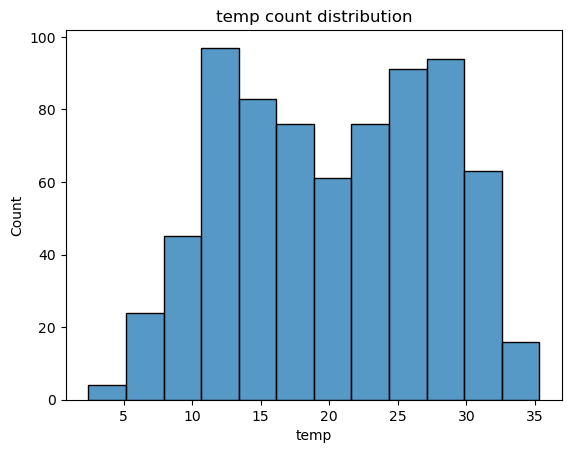

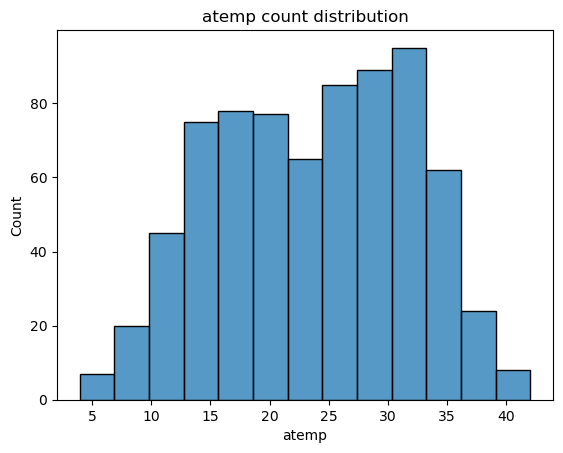

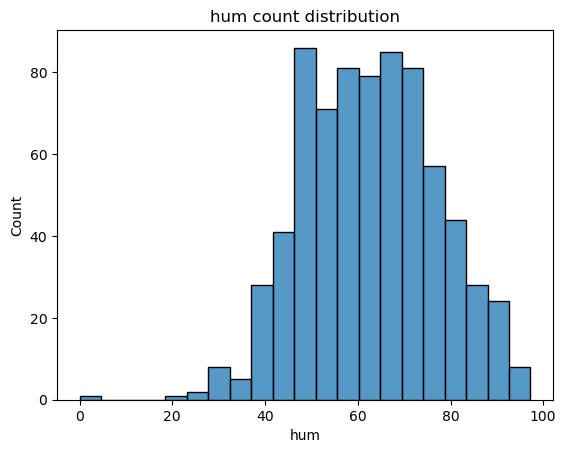

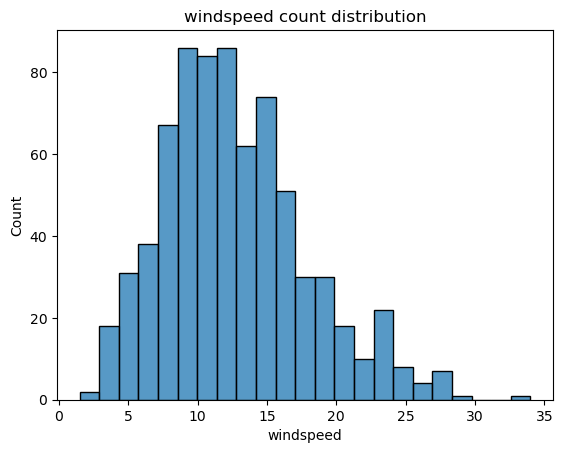

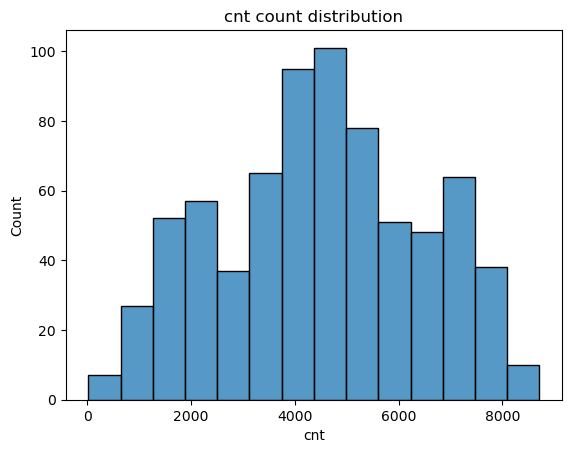

In [22]:
for column in continuous_variables:
    sns.histplot(x=df[column])
    plt.title(column+ ' count distribution')
    plt.show()

<font color='green'>Observation</font>
 1. Most days winds speed between 7.5 to 17.5
 2. Most days humidity between 50 to 80
 3. Most days demand between 4K to 6K

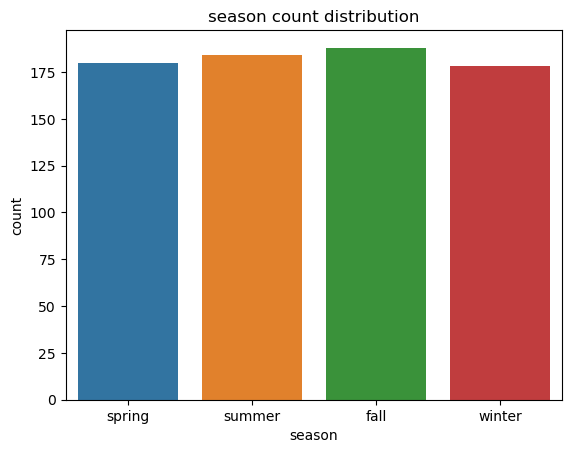

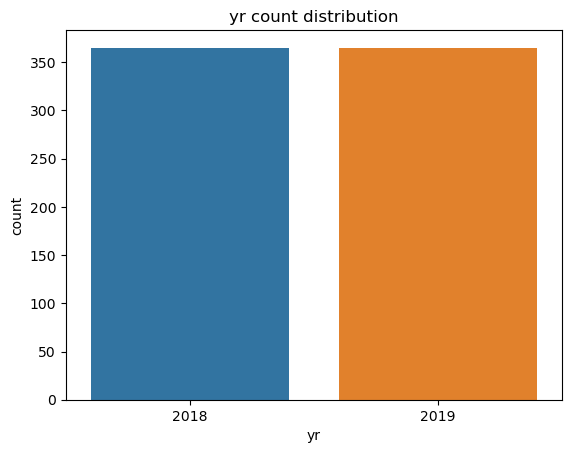

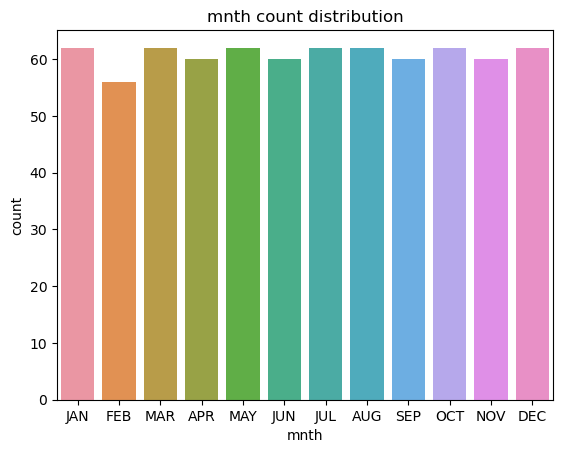

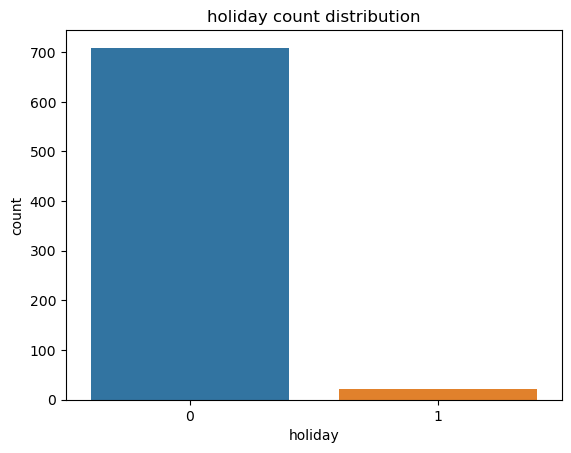

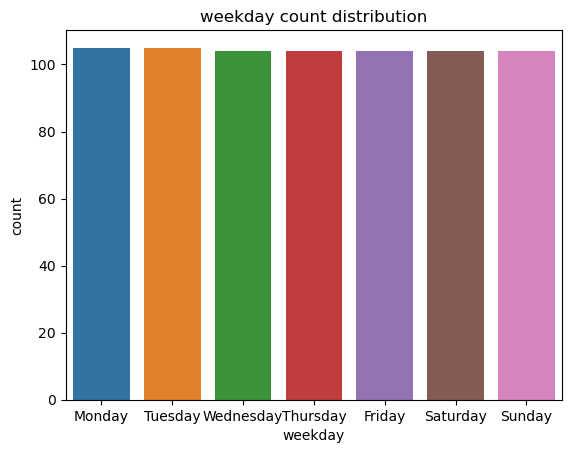

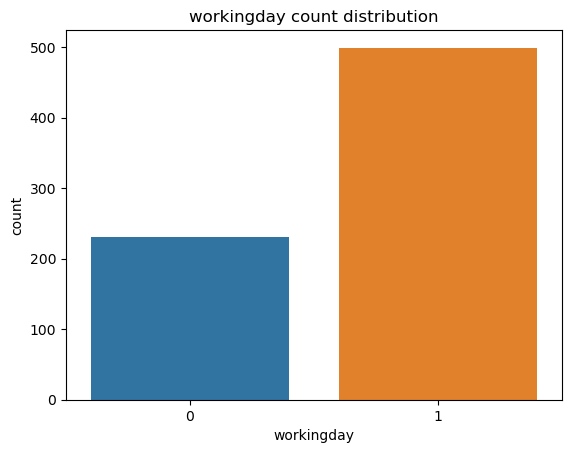

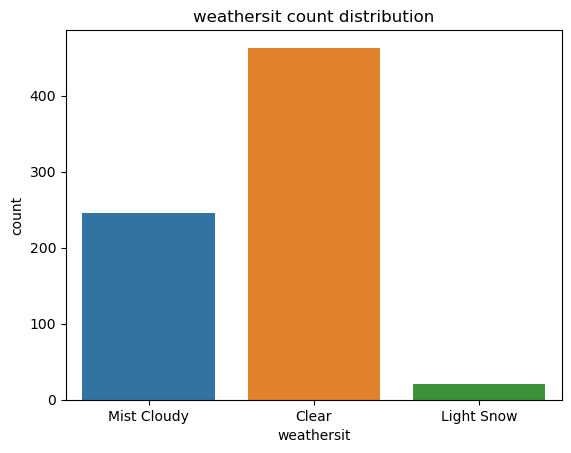

In [23]:
for column in categorical_variables:
    sns.countplot(x=df[column])
    plt.title(column+ ' count distribution')
    plt.show()

<font color='green'>Observation</font>
 1. As there is one row present for each day - month,year,weekday,season,holiday,working day has no patterns simply reflects calender
 2. No Data for weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Bivariate Analysis

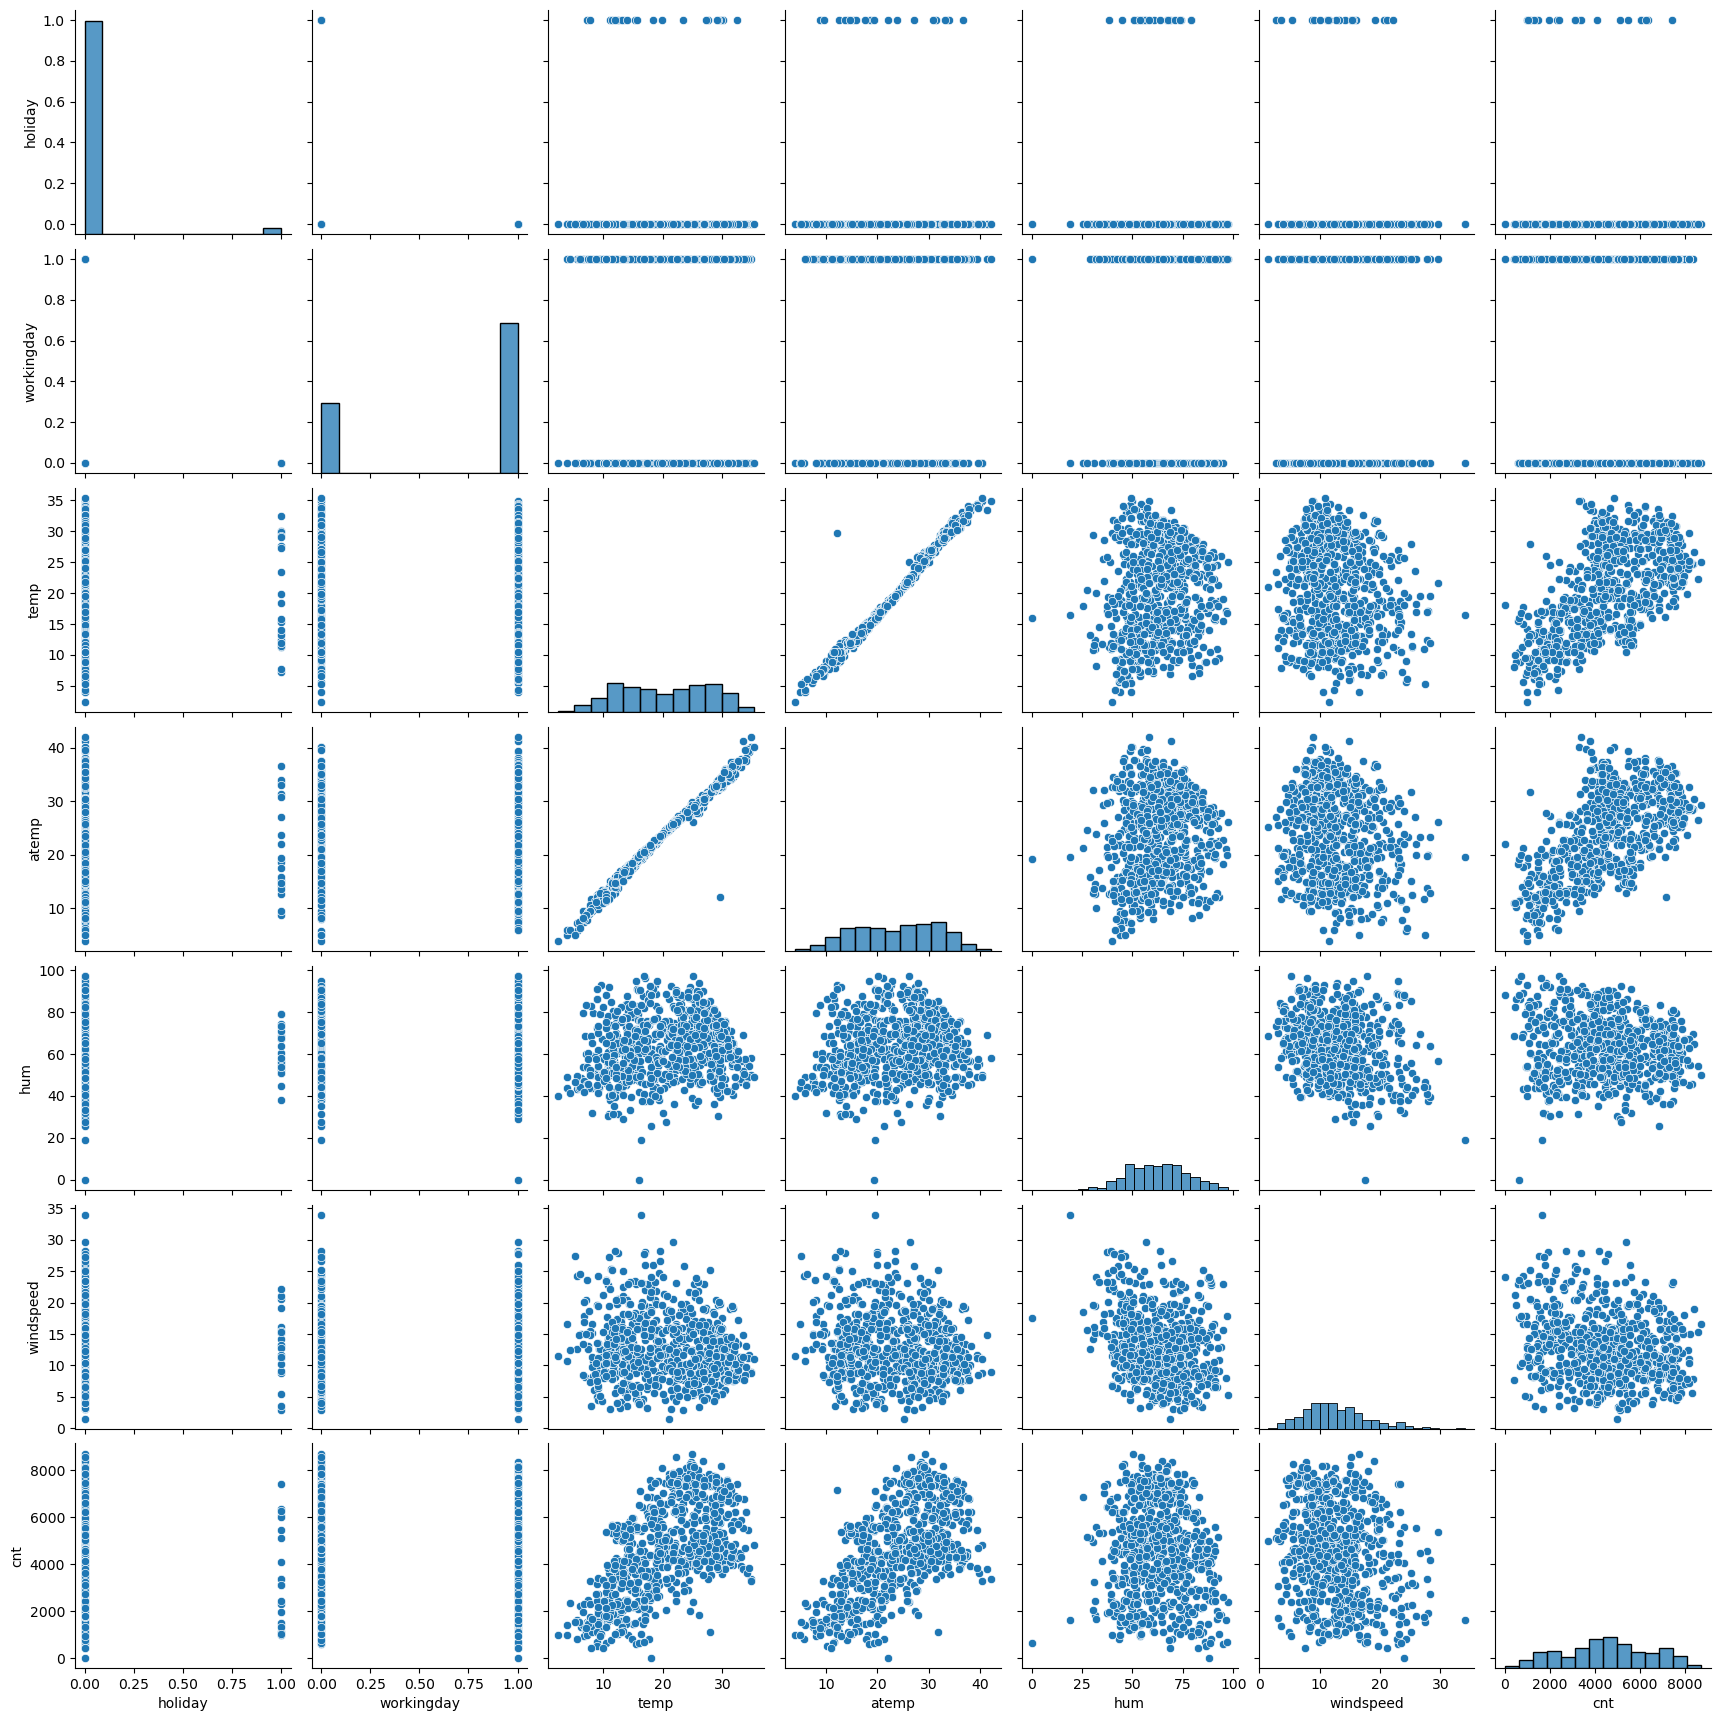

In [24]:
#creating pair plot for numerical values
sns.pairplot(df)
plt.show()

<font color='green'>Observation</font>
  1. temp and atemp haing postive linear relationship with demand
  2. humidity and windspeed having negative linear relationship with demand

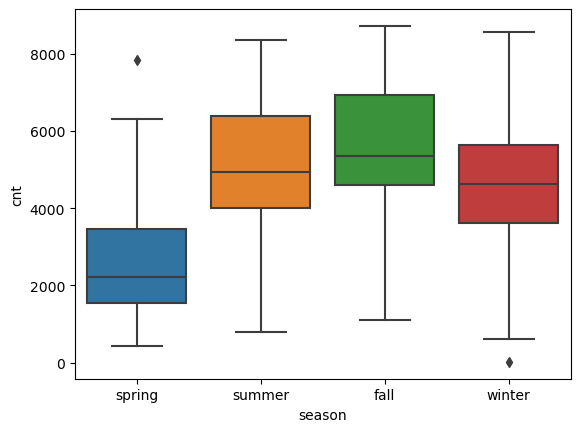

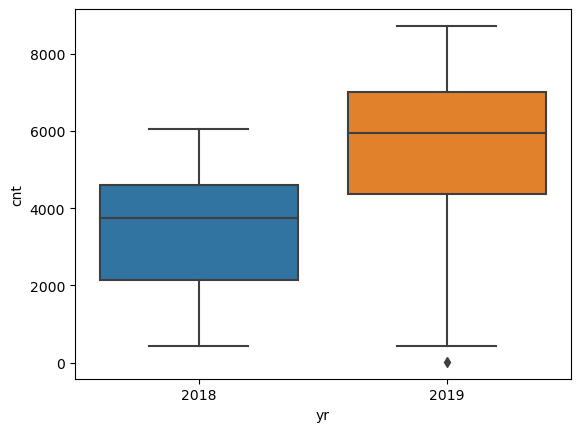

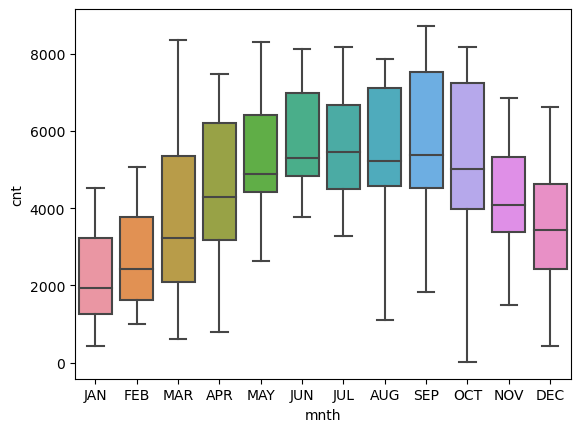

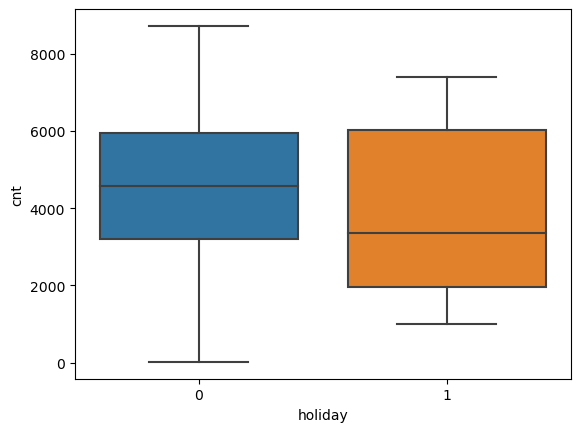

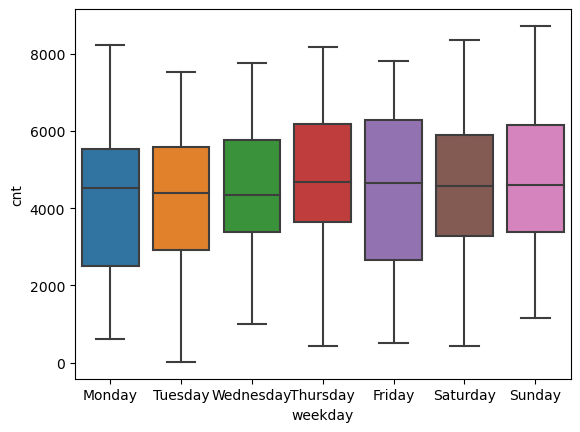

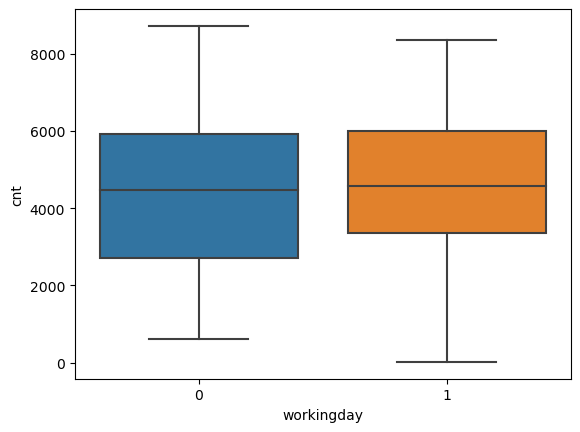

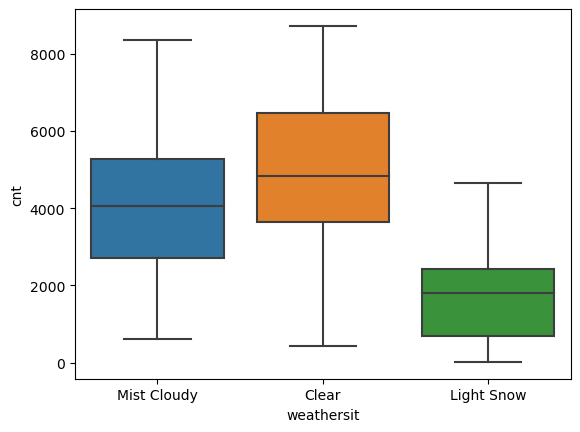

In [25]:
for column in categorical_variables:
    sns.boxplot(x=df[column],y=df["cnt"])
    plt.show()

<font color='green'>Observation</font>
1. Spring Season having lesser demand compared to other season and fall season had more demand
2. 2019 had more demand compared to 2018
3. Demand increase gradually from JAN to SEP and then drops
4. More demand observed on the non-holiday
5. More demand observed on the clear weather situation


<font color='green'>validation of lienar Regression Assumption</font> 
1. We can observe linear relation between target variable and features (temp,atemp)

### Creating Dummy Variables

In [26]:
# creating dummies for categorical variable which is non binary
# drop_first= True makes sure n-1 dummy variable creation
dummies_df = pd.get_dummies(df[["season","yr","mnth","weekday","weathersit"]], drop_first = True)
df = pd.concat([df, dummies_df], axis = 1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_AUG', 'mnth_DEC', 'mnth_FEB', 'mnth_JAN', 'mnth_JUL', 'mnth_JUN',
       'mnth_MAR', 'mnth_MAY', 'mnth_NOV', 'mnth_OCT', 'mnth_SEP',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow', 'weathersit_Mist Cloudy'],
      dtype='object')

In [27]:
# droping Original columns
df.drop(["season","yr","mnth","weekday","weathersit"], axis = 1, inplace = True)

## Model Building

### Test Train Split

In [28]:
#using 70% training data and 30% test data
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling features

In [29]:
#using min max scaler to scale the numerical values
scaler = MinMaxScaler()
numerical_cloumns = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[numerical_cloumns] = scaler.fit_transform(df_train[numerical_cloumns])

In [30]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_OCT,mnth_SEP,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


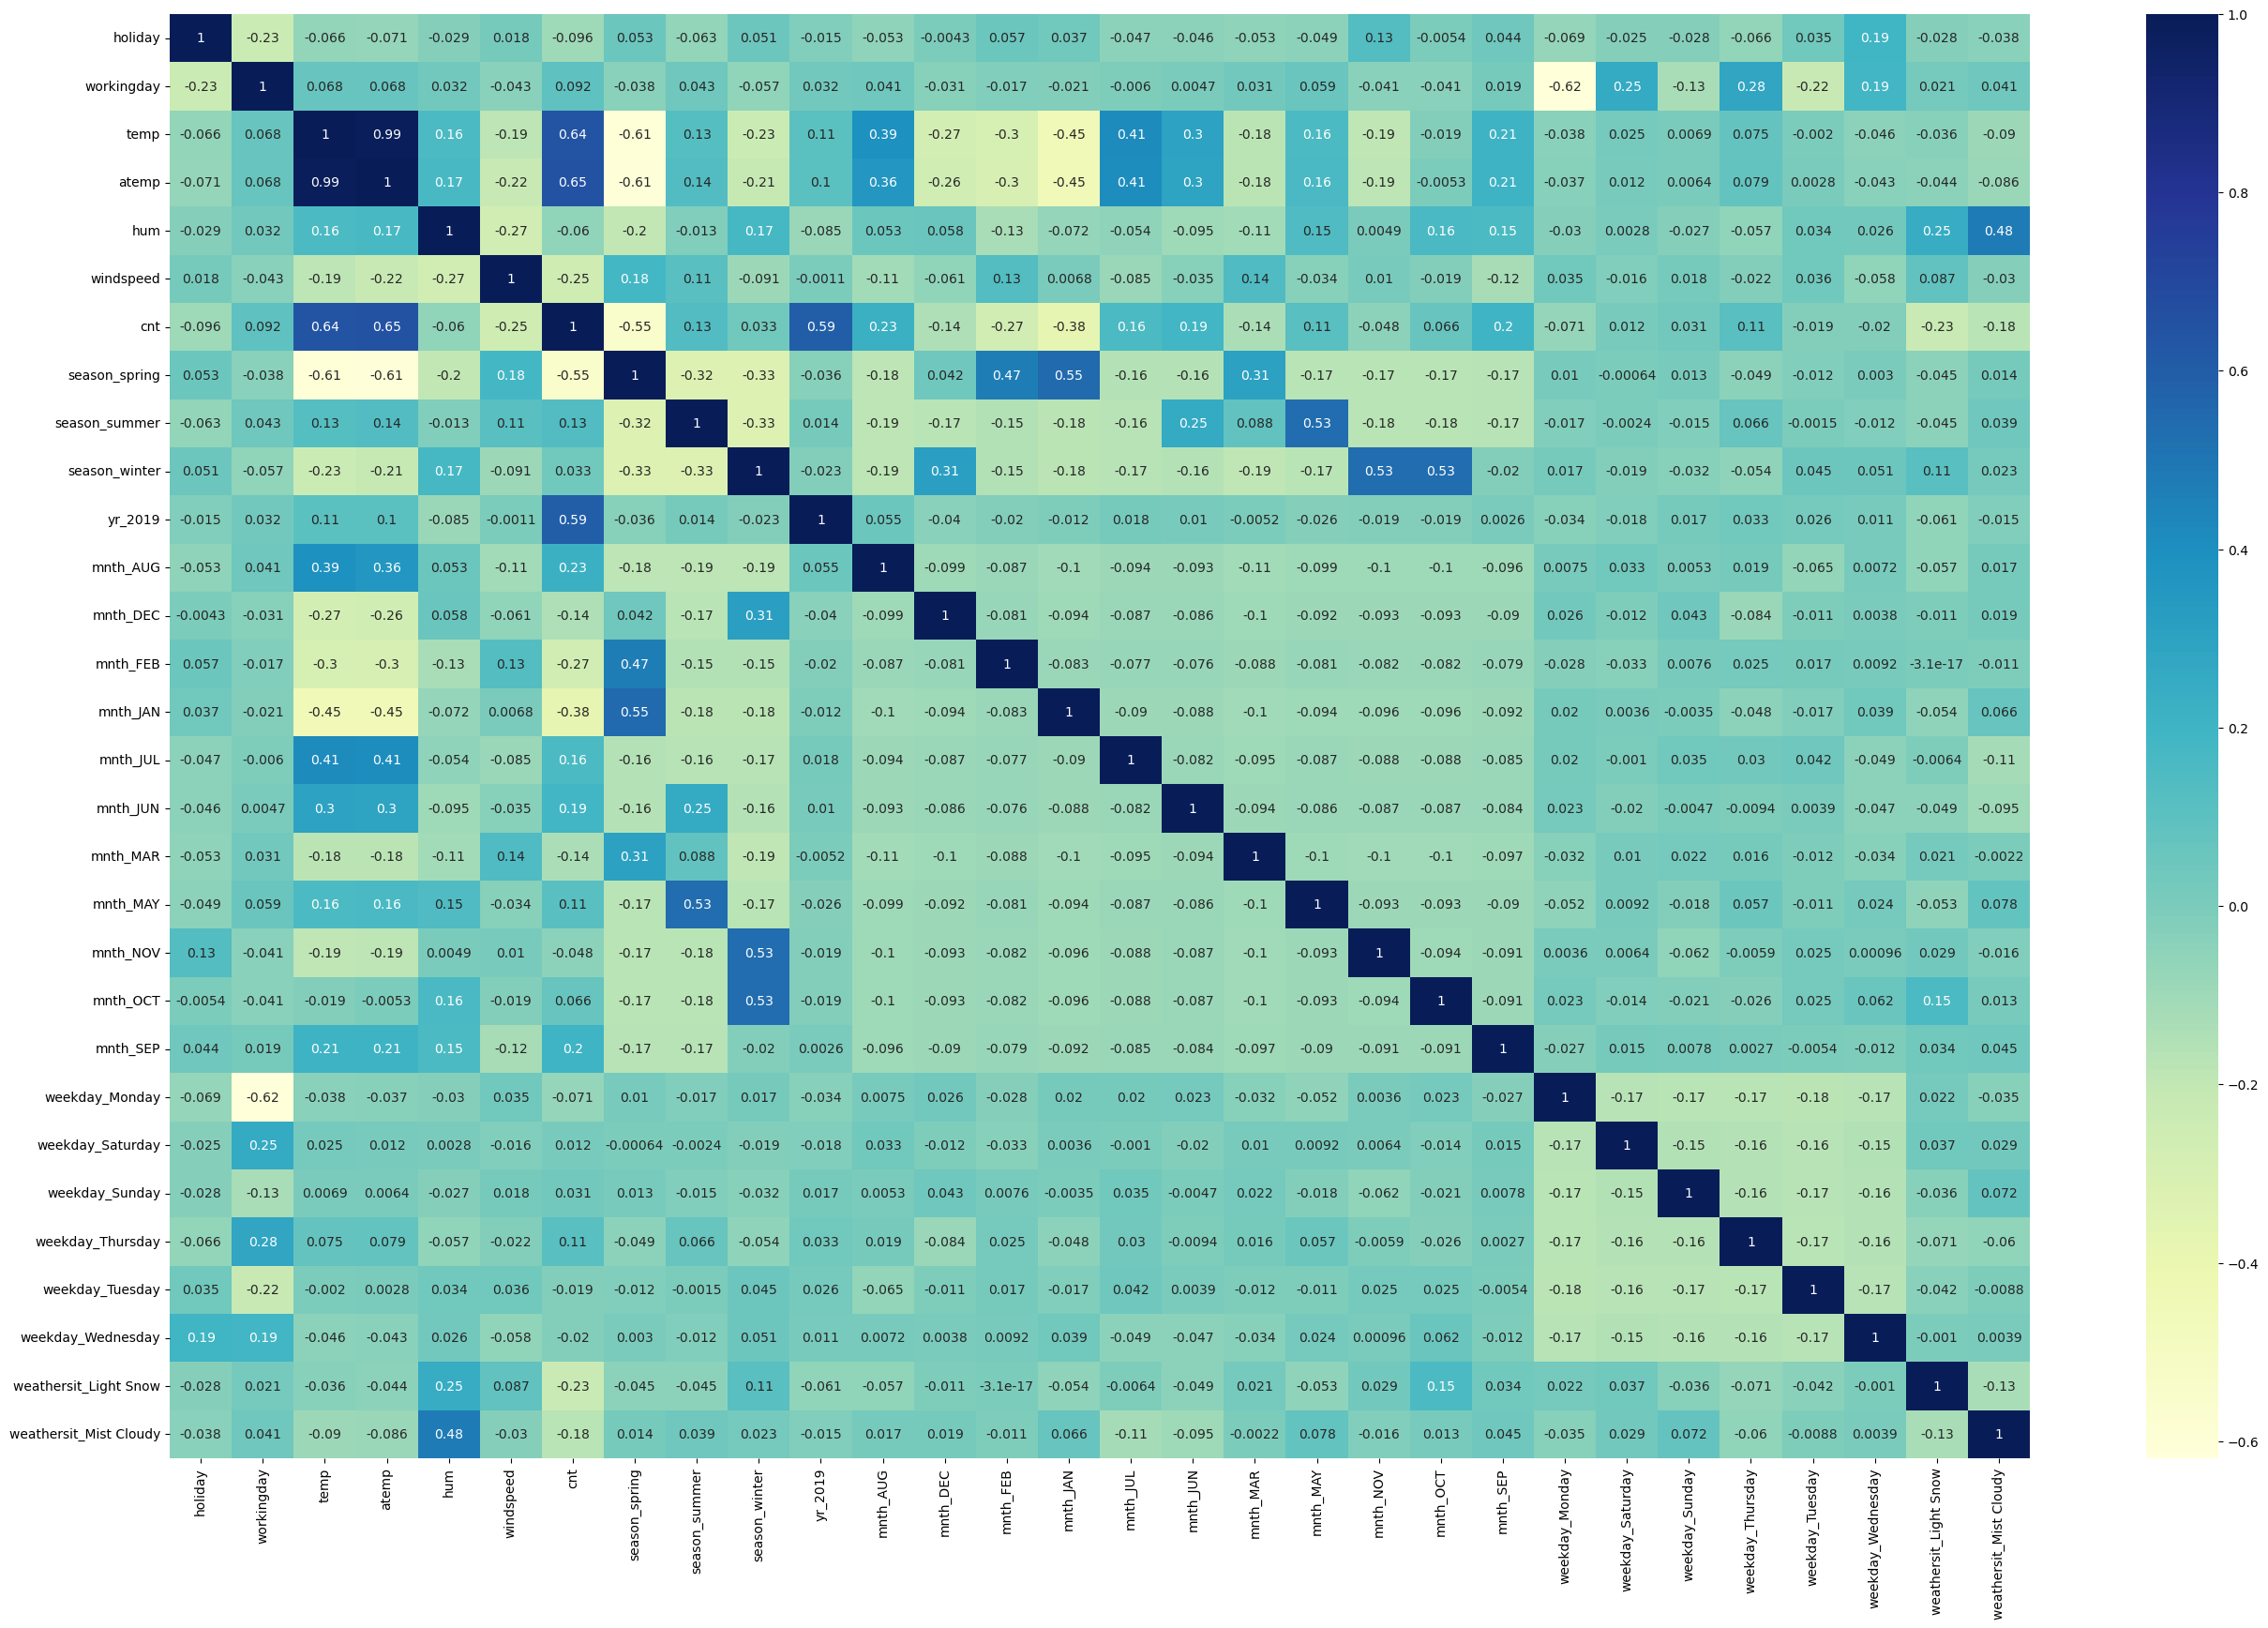

In [31]:
#checking the correlation coefficients to see which variables are highly correlated 
plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<font color='green'>Observation</font>
1. temp and atemp are highly correlated
2. seasons and respective months in which season occurs are highly correlated as expected
3. humidity and weather light snow and mist are highly co-related
4. Demand(cnt) having high correlation with temp, year-2019

In [32]:
df_train.columns.size

30

As there are 29 features we can use RFE Automated + Manual approach for feature selection

### Feature Selection

#### RFE

In [33]:
#split target and features
y_train = df_train.pop('cnt') #removing column cnt from df_train
X_train = df_train

In [34]:
#using RFE get 15 features
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
list(zip(X_train.columns,selector.support_,selector.ranking_)) #printing along with rank

[('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_AUG', False, 7),
 ('mnth_DEC', True, 1),
 ('mnth_FEB', False, 2),
 ('mnth_JAN', True, 1),
 ('mnth_JUL', True, 1),
 ('mnth_JUN', False, 13),
 ('mnth_MAR', False, 14),
 ('mnth_MAY', False, 6),
 ('mnth_NOV', True, 1),
 ('mnth_OCT', False, 10),
 ('mnth_SEP', True, 1),
 ('weekday_Monday', False, 5),
 ('weekday_Saturday', False, 12),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 3),
 ('weekday_Wednesday', False, 8),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist Cloudy', True, 1)]

In [35]:
#filtering the data based on selected features
selected_features=df_train.columns[selector.support_]
X_train=df_train[selected_features]
X_test=df_test[selected_features]

In [36]:
X_train_sm=sm.add_constant(X_train)#adding contant to work with stats model

In [37]:
#model training
model1=sm.OLS(y_train,X_train_sm)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.34e-189
Time:                        18:59:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3202      0.036      8.886      0.000       0.249       0.391
holiday                   -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                       0.4800      0.037     12.977      0.000       0.407       0.553
hum                       -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                 -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring             -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer              0.0408      0.015      2.659      0.008       0.011       0.071
season_winter              0.1034      0.018      5.763      0.000       0.068       0.139
yr_2019                    0.2303      0.008     28.511      0.000       0.214       0.246
mnth_DEC                  -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_JAN                  -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_JUL                  -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_NOV                  -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_SEP                   0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light Snow     -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist Cloudy    -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#checking for VIF
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) 
                 for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,holiday,1.059432
1,temp,17.795518
2,hum,30.939617
3,windspeed,4.719884
4,season_spring,4.369102
5,season_summer,2.805602
6,season_winter,4.058890
7,yr_2019,2.088118
8,mnth_DEC,1.550111
9,mnth_JAN,1.745893


### Manual Feature Selection

In [39]:
#droping humidity due to high VIF
X_train_sm=X_train_sm.drop(["hum"],axis=1)

In [40]:
# re-iterating the model2
model2=sm.OLS(y_train,X_train_sm)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.57e-186
Time:                        18:59:56   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2466      0.032      7.679      0.000       0.184       0.310
holiday                   -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                       0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                 -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring             -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer              0.0333      0.015      2.148      0.032       0.003       0.064
season_winter              0.0887      0.018      4.951      0.000       0.053       0.124
yr_2019                    0.2343      0.008     28.709      0.000       0.218       0.250
mnth_DEC                  -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_JAN                  -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_JUL                  -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_NOV                  -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_SEP                   0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Light Snow     -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Mist Cloudy    -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#checking for VIF
vif_data=pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,63.342075
1,holiday,1.032510
2,temp,4.100483
3,windspeed,1.123296
4,season_spring,5.207346
5,season_summer,2.726251
6,season_winter,3.681795
7,yr_2019,1.022101
8,mnth_DEC,1.479669
9,mnth_JAN,1.665169


In [42]:
#droping season_spring due to high VIF
X_train_sm=X_train_sm.drop(["season_spring"],axis=1)

In [43]:
#re-iterate the model
model3=sm.OLS(y_train,X_train_sm)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.65e-185
Time:                        18:59:56   Log-Likelihood:                 499.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     496   BIC:                            -912.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1650      0.021      7.849      0.000       0.124       0.206
holiday                   -0.0961      0.026     -3.660      0.000      -0.148      -0.045
temp                       0.5209      0.027     19.637      0.000       0.469       0.573
windspeed                 -0.1659      0.025     -6.539      0.000      -0.216      -0.116
season_summer              0.0688      0.011      6.064      0.000       0.047       0.091
season_winter              0.1288      0.013      9.609      0.000       0.102       0.155
yr_2019                    0.2330      0.008     28.296      0.000       0.217       0.249
mnth_DEC                  -0.0381      0.018     -2.149      0.032      -0.073      -0.003
mnth_JAN                  -0.0553      0.018     -2.994      0.003      -0.092      -0.019
mnth_JUL                  -0.0381      0.018     -2.081      0.038      -0.074      -0.002
mnth_NOV                  -0.0303      0.019     -1.602      0.110      -0.067       0.007
mnth_SEP                   0.0852      0.016      5.170      0.000       0.053       0.118
weathersit_Light Snow     -0.2894      0.025    -11.659      0.000      -0.338      -0.241
weathersit_Mist Cloudy    -0.0803      0.009     -9.142      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       59.040   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.091
Skew:                          -0.650   Prob(JB):                     6.87e-28
Kurtosis:                       5.048   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#checking for VIF
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,26.592547
1,holiday,1.030118
2,temp,2.155420
3,windspeed,1.114788
4,season_summer,1.434964
5,season_winter,2.021185
6,yr_2019,1.019844
7,mnth_DEC,1.462215
8,mnth_JAN,1.653746
9,mnth_JUL,1.422884


In [45]:
# dropping month Nov due to p value >0.05
X_train_sm=X_train_sm.drop(["mnth_NOV"],axis=1)

In [46]:
#re-iterate model 4
model4=sm.OLS(y_train,X_train_sm)
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.40e-186
Time:                        18:59:56   Log-Likelihood:                 498.62
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     497   BIC:                            -916.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1590      0.021      7.674      0.000       0.118       0.200
holiday                   -0.1009      0.026     -3.861      0.000      -0.152      -0.050
temp                       0.5289      0.026     20.263      0.000       0.478       0.580
windspeed                 -0.1660      0.025     -6.530      0.000      -0.216      -0.116
season_summer              0.0700      0.011      6.170      0.000       0.048       0.092
season_winter              0.1178      0.012     10.206      0.000       0.095       0.141
yr_2019                    0.2330      0.008     28.254      0.000       0.217       0.249
mnth_DEC                  -0.0273      0.016     -1.660      0.097      -0.060       0.005
mnth_JAN                  -0.0510      0.018     -2.786      0.006      -0.087      -0.015
mnth_JUL                  -0.0391      0.018     -2.133      0.033      -0.075      -0.003
mnth_SEP                   0.0880      0.016      5.361      0.000       0.056       0.120
weathersit_Light Snow     -0.2867      0.025    -11.558      0.000      -0.335      -0.238
weathersit_Mist Cloudy    -0.0798      0.009     -9.080      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       55.258   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.630
Skew:                          -0.625   Prob(JB):                     3.49e-25
Kurtosis:                       4.933   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#checking for VIF
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,25.748358
1,holiday,1.016894
2,temp,2.079961
3,windspeed,1.114786
4,season_summer,1.429129
5,season_winter,1.495229
6,yr_2019,1.019841
7,mnth_DEC,1.248606
8,mnth_JAN,1.618597
9,mnth_JUL,1.421253


In [48]:
# dropping month December  due to pvalue >0.05
X_train_sm=X_train_sm.drop(["mnth_DEC"],axis=1)

In [49]:
#re-iterate model 5
model5=sm.OLS(y_train,X_train_sm)
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.63e-186
Time:                        18:59:56   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1481      0.020      7.522      0.000       0.109       0.187
holiday                   -0.0994      0.026     -3.802      0.000      -0.151      -0.048
temp                       0.5408      0.025     21.516      0.000       0.491       0.590
windspeed                 -0.1615      0.025     -6.380      0.000      -0.211      -0.112
season_summer              0.0722      0.011      6.396      0.000       0.050       0.094
season_winter              0.1153      0.011     10.057      0.000       0.093       0.138
yr_2019                    0.2331      0.008     28.211      0.000       0.217       0.249
mnth_JAN                  -0.0442      0.018     -2.474      0.014      -0.079      -0.009
mnth_JUL                  -0.0398      0.018     -2.169      0.031      -0.076      -0.004
mnth_SEP                   0.0898      0.016      5.473      0.000       0.058       0.122
weathersit_Light Snow     -0.2845      0.025    -11.465      0.000      -0.333      -0.236
weathersit_Mist Cloudy    -0.0798      0.009     -9.065      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       53.048   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.062
Skew:                          -0.609   Prob(JB):                     9.31e-24
Kurtosis:                       4.873   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#checking VIF
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,23.182831
1,holiday,1.015814
2,temp,1.922190
3,windspeed,1.102384
4,season_summer,1.409581
5,season_winter,1.468544
6,yr_2019,1.019824
7,mnth_JAN,1.538142
8,mnth_JUL,1.420461
9,mnth_SEP,1.189275


1. All the P value are <0.005 and VIF <5 
2. Selected 10 features are optimal and we can stop iteration

## Model Evaluation

### Residual Analysis

In [51]:
#calculating y_pred
y_pred = result5.predict(X_train_sm)

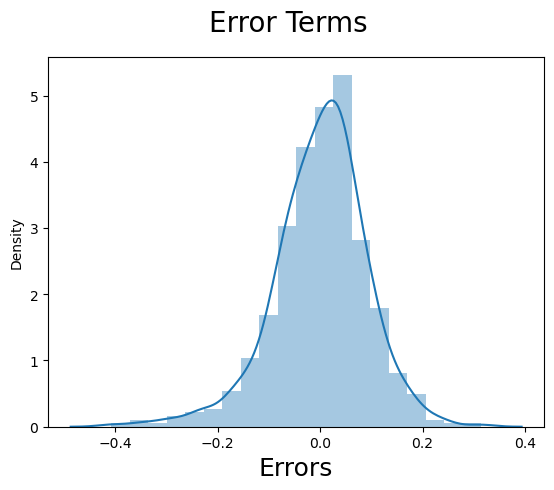

In [52]:

def plot_Error_Terms(y_actual,y_pred):
    fig = plt.figure()
    sns.distplot((y_actual - y_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)
    plt.xlabel('Errors', fontsize = 18)

# Plot the histogram of the error terms
plot_Error_Terms(y_train,y_pred)   

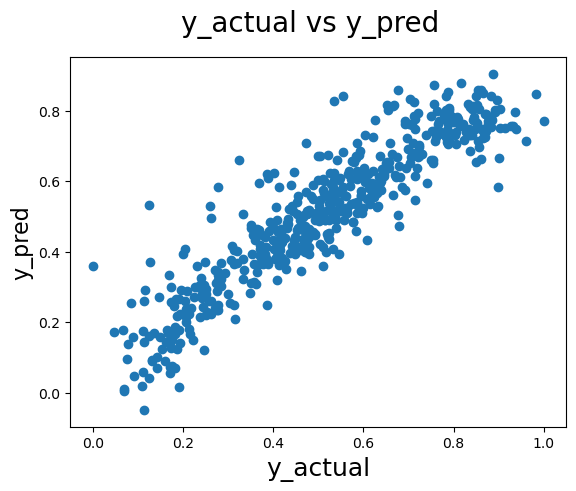

In [53]:

def plot_actual_and_pred(y_actaul,y_pred):
    fig = plt.figure()
    plt.scatter(y_actaul,y_pred)
    fig.suptitle('y_actual vs y_pred', fontsize=20)             
    plt.xlabel('y_actual', fontsize=18)                         
    plt.ylabel('y_pred', fontsize=16)
    
#ploting actual vs prediction for train data.   
plot_actual_and_pred(y_train,y_pred)

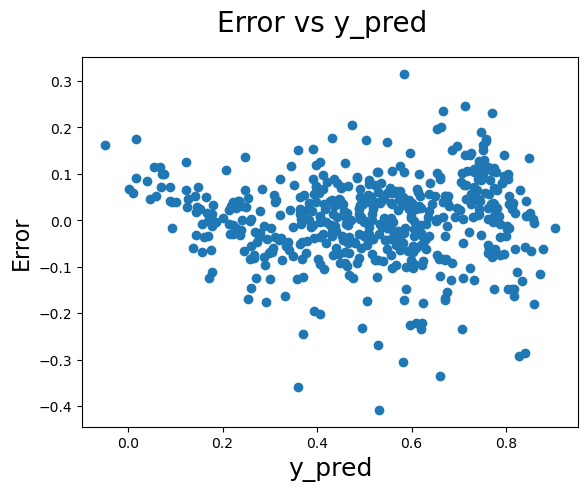

In [54]:
#plotting error variance
def plot_error_and_pred(y_actual,y_pred):
    fig = plt.figure()
    plt.scatter(y_pred,(y_actual-y_pred))
    fig.suptitle('Error vs y_pred', fontsize=20)             
    plt.xlabel('y_pred', fontsize=18)                         
    plt.ylabel('Error', fontsize=16)
plot_error_and_pred(y_train,y_pred)

In [55]:
#calculating root mean square error
rmse = mean_squared_error(y_train, y_pred, squared=False)
rmse

0.0912772893046919

### model Evaluation using Test data

In [56]:
#scaling test data with training data fitting 
df_test[numerical_cloumns] = scaler.transform(df_test[numerical_cloumns])
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_OCT,mnth_SEP,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
#preparing test data for prediction
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_test_sm = sm.add_constant(X_test)

In [59]:
X_test_sm = X_test_sm[X_train_sm.columns]

In [60]:
#making prediction on test data
y_pred_test = result5.predict(X_test_sm)

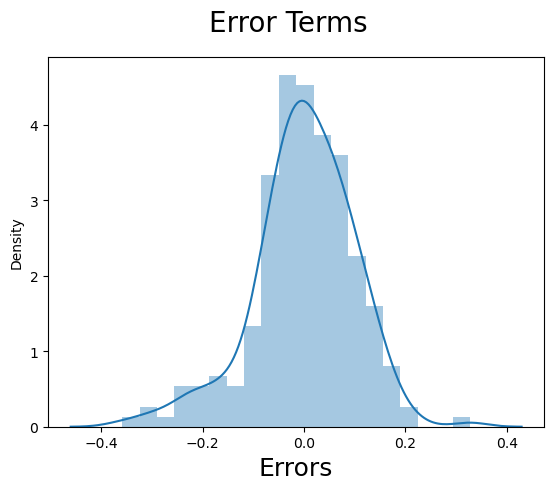

In [61]:
# Plot the histogram of the error terms for test data
plot_Error_Terms(y_test,y_pred_test)   

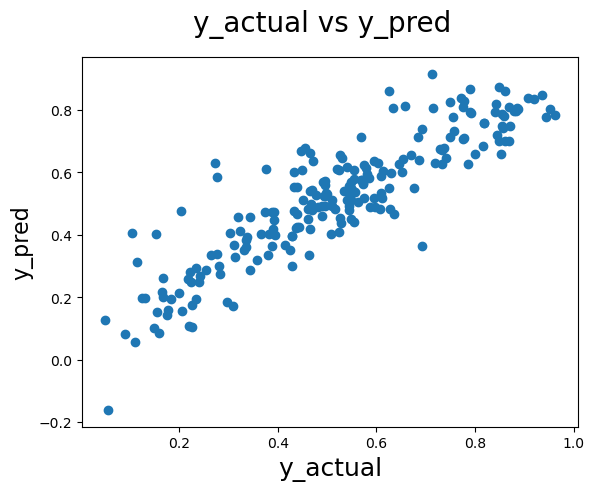

In [62]:
#ploting actual vs prediction for test data
plot_actual_and_pred(y_test,y_pred_test)

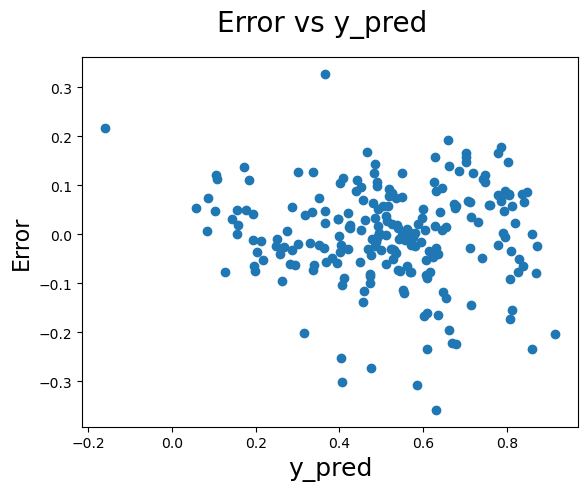

In [63]:
#plotting error variance
plot_error_and_pred(y_test,y_pred_test)

In [64]:
r2=r2_score(y_test, y_pred_test)
r2

0.7911553831774946

In [65]:
X_test_sm.shape

(219, 12)

In [66]:
adj_r2 = 1-(1-r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1)
adj_r2

0.7789896773431738

In [67]:
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmse

0.09959540076640669

<font color='green'>Observation</font>

From both training and test data residual analysis we can confirm that
1. Error terms are normally distributed 
2. Error terms are independent of each other
3. Error terms have constant variance (homoscedasticity)

### Model Efficiency

1. Training Data R^2 - 0.835
2. Training Data Adjusted R^2 -0.831
3. Training Data MSE -  0.0912
4. Test Data R^2 - 0.791
5. Test Data Adjusted R^2 - 0.778
6. Test Data MSE - 0.0995

## Conclusion

$ cnt  = 0.1481-0.0994  \times holiday + 0.5408 \times temp -0.1615 \times windspeed + 0.0722 \times season \_ summer + 0.1153 \times season\_winter + 0.2331 \times yr\_2019
-0.0442 \times mnth\_JAN -0.0398 \times mnth\_JUL +0.0898 \times mnth\_SEP -0.2845 \times weathersit\_Light Snow -0.0798 \times weathersit\_Mist Cloudy $

Following are the predictor impacting demand in order highest to lowest
1. temp
2. weathersit_Light Snow
3. year 2019
4. windspeed
5. season_winter
6. holiday
7. mnth_SEP
8. weathersit_Mist Cloudy
9. season_summer
10. mnth_JAN
11. mnth_JUL

How well this predictors describe demand is explained by it's respective co-efficient on the above equation